In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('../Data/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
# Divide the features into dependent and independent variables
X = df[['Weight']]
y = df['Height']

In [4]:
X.shape, y.shape

((23, 1), (23,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [7]:
# Standarsdising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train_scaled

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [10]:
# Train a simple model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
y_pred = lin_reg.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, np.sqrt(mse), mae)
print(r2, (1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

109.77592599051664 10.477400726827081 9.822657814519232
0.776986986042344 0.7026493147231252


In [14]:
print("The slope or coefficient of the model is: ", lin_reg.coef_)
print("The intercept of the model is: ", lin_reg.intercept_)

The slope or coefficient of the model is:  [17.03440872]
The intercept of the model is:  157.5


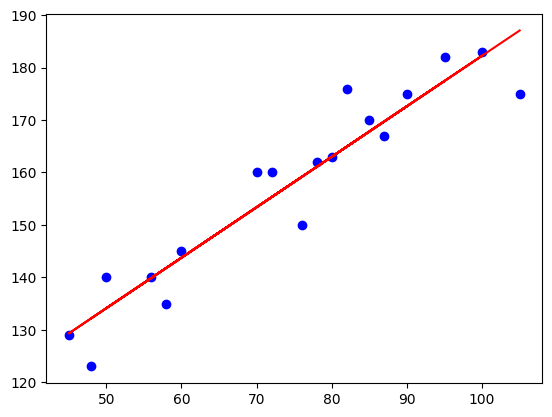

In [15]:
plt.scatter(X_train, y_train, color='Blue')
plt.plot(X_train, lin_reg.predict(X_train_scaled), color='red')

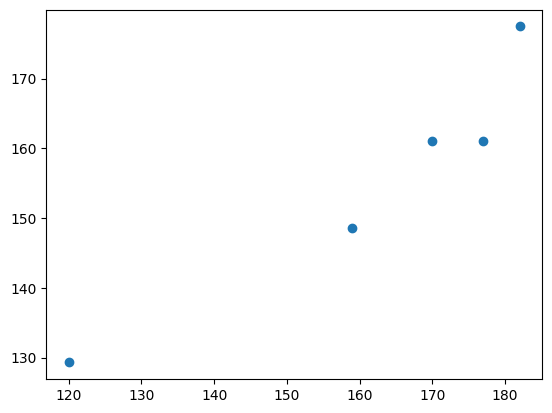

In [18]:
# Assumptions
plt.scatter(y_test, y_pred)

In [19]:
residuals = y_test - y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/var/folders/z4/nk6c6p514xb426nd9nr8d29w0000gn/T/ipykernel_24094/2104174931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=5, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

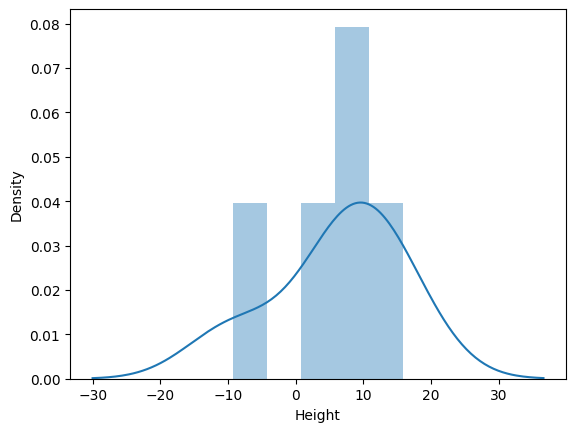

In [23]:
import seaborn as sns
sns.distplot(residuals, bins=5, kde=True)

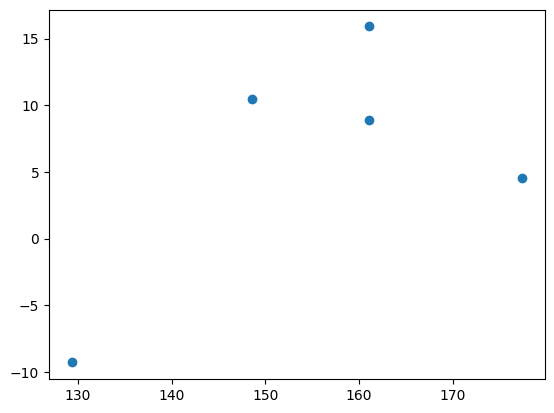

In [24]:
plt.scatter(y_pred, residuals)